In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Kyphsis data set
# Number of patient who had operation for spinal correction
# Show if the Kyphosis is absent or not after the operation
# The age is in month 
# Number is the number of vertibale in the operation
# Start is a first vertibale was operated

df = pd.read_csv('kyphosis.csv')

In [8]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

# Small data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


<Figure size 3600x2400 with 0 Axes>

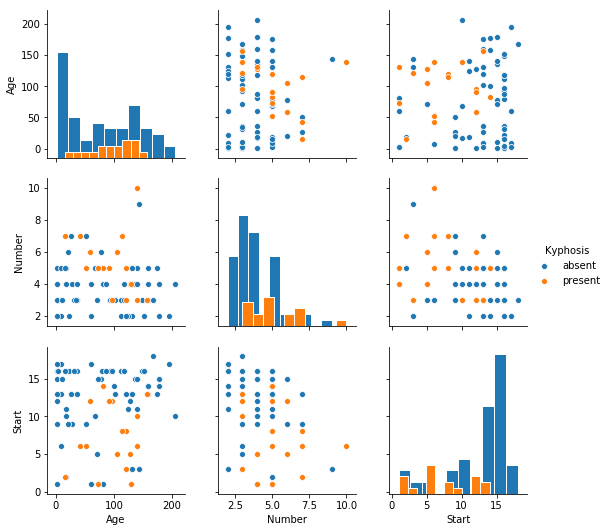

In [23]:
fig = plt.figure(dpi=600)
sns.pairplot(df, hue='Kyphosis', diag_kind='hist',
            diag_kws={'ec':'w'})

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Kyphosis', axis=1)

In [28]:
y = df['Kyphosis']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [47]:
# Decision Tree Method

from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [50]:
predictions = dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[21  2]
 [ 7  3]]


              precision    recall  f1-score   support

      absent       0.75      0.91      0.82        23
     present       0.60      0.30      0.40        10

   micro avg       0.73      0.73      0.73        33
   macro avg       0.68      0.61      0.61        33
weighted avg       0.70      0.73      0.70        33



In [53]:
# Now compare the results with Random Forest Method

from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(n_estimators=200)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
rfc_predict = rfc.predict(X_test)

In [67]:
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print(classification_report(y_test,rfc_predict))

[[23  0]
 [ 8  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        23
     present       1.00      0.20      0.33        10

   micro avg       0.76      0.76      0.76        33
   macro avg       0.87      0.60      0.59        33
weighted avg       0.82      0.76      0.69        33

